In [1]:
#Name: Vinayak Gaikwad
#Student ID: 300137895
#COMP 381 - Summer 2018
#Term Project.

In [27]:
#I will be using a Communities and Crime Dataset taken from the UCI machine learning Repository.
#Link: https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime
#The dataset contains data collected from within United States. The data is a combination of data collected from 
#various data sources like US census, US LEMAS survey and the crime data from FBI UCR.

#I mainly plan to use regression algorithms like linear and logitic regression, polynomial regression and lasso. 
#I am considering KNN classification too.


In [6]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression,SelectFromModel
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingClassifier, RandomForestClassifier, GradientBoostingClassifier

%matplotlib inline
plt.style.use('seaborn-white')

In [7]:
df = pd.read_csv('C:/Users/Vinay/PycharmProjects/Project/communities.csv')
df.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.20
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.67
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.43
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.03


In [8]:
X = df.drop(['state','communityname','ViolentCrimesPerPop'],axis = 1)
Xtrain = X[0:1000]
Xtest = X[1000:]
y = df['ViolentCrimesPerPop']
ytrain= y[0:1000]
ytest = y[1000:]


In [5]:
#plt.scatter(Xt, yt,color='g')
#print(len(Xt))

#plt.xlim(0,0.16)
#plt.ylim(0,1)
#plt.show()

The MSE using all features is 0.02023605553621239
R-Squared value is 0.6067416981206519


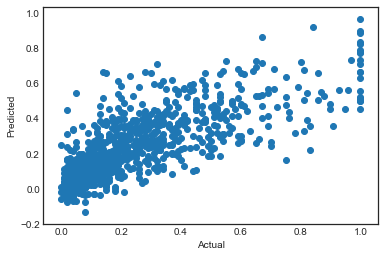

In [6]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

preds_train = lm.predict(Xtrain)
preds_test = lm.predict(Xtest)

mse_full = mean_squared_error(ytest, preds_test)
print("The MSE using all features is %s" % mse_full)
rs = r2_score(ytrain, preds_train)
print("R-Squared value is", +rs)

plt.figure()
plt.scatter(ytest, preds_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [7]:
#model = sm.OLS(ytrain,Xtrain).fit()
#print(model.summary())

24
5


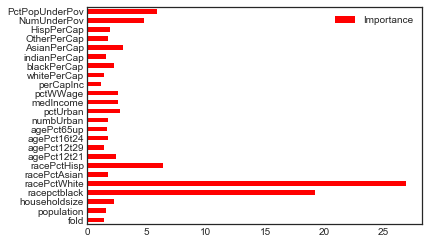

In [9]:
"""
perc = 30 # percentage of features to keep 

selector = SelectPercentile(f_regression, percentile=perc)
selector.fit_transform(Xtrain, ytrain)
selected_cols = selector.get_support()
selected_feas = Xtrain.columns.values[selected_cols]
print("These are the feas that were selected:\n")
print(selected_feas)
"""
# Fit randomized decision tress
etc = ExtraTreesRegressor()
etc = etc.fit(Xtrain, ytrain)
model = SelectFromModel(etc, prefit= True)
XtrainNew = model.transform(Xtrain)
XtestNew = model.transform(Xtest)

importance = pd.DataFrame({'Importance': etc.feature_importances_*100}, index = Xtrain.columns)
#importance.sort_values(by='importance', axis=0, ascending=True).plot(kind = 'barh', color = 'r')
#plt.xlabel('Variable Importance')
#plt.gca().legend_ = None
importance.plot(kind = 'barh', color = 'r')
print("Total Features: ", len(Xtrain.columns))
print("Selected Features: ", XtrainNew.shape[1])

In [10]:

#X_sub_train = Xtrain[selected_feas]
#X_sub_test = Xtest[selected_feas]
# Perform linear regression using the selected feature and see if it improves the results.
ln = LinearRegression()
ln.fit(XtrainNew, ytrain)

preds_train = ln.predict(XtrainNew)
preds_test = ln.predict(XtestNew)
mse_sub = mean_squared_error(ytest, preds_test)
print("The MSE using just the selected features is %s" % mse_sub)
rs = r2_score(ytrain, preds_train)
print("R-Squared value is", +rs)

The MSE using just the selected features is 0.022113540418610567


R-Squared value is 0.5505417865873367


In [12]:
"""
# Residual Sum of Squares
rss = sum((ytest - preds_sub)**2)
print("RSS is",+rss)

# Mean Squared Error
mse = mean_squared_error(ytest, preds_sub)
print("MSE is", +mse)

# R-squared
rs = r2_score(ytest, preds_sub)
print("R-Squared value is", +rs)
"""


'\n# Residual Sum of Squares\nrss = sum((ytest - preds_sub)**2)\nprint("RSS is",+rss)\n\n# Mean Squared Error\nmse = mean_squared_error(ytest, preds_sub)\nprint("MSE is", +mse)\n\n# R-squared\nrs = r2_score(ytest, preds_sub)\nprint("R-Squared value is", +rs)\n'

KFold(n_splits=10, random_state=None, shuffle=False)
The MSE using cross validation on the entire dataset is 0.02188407541577058


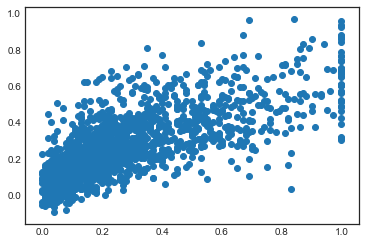

In [13]:
kf = KFold(n_splits=10)
print (kf)
preds_cv = []
for train, test in kf.split(X):
    X_cv = X.iloc[train]
    y_cv = y.iloc[train]
    
    X_cv_test = X.iloc[test]
    
    lm_cv = LinearRegression()
    lm_cv.fit(X_cv, y_cv)
    preds = lm_cv.predict(X_cv_test)
    preds_cv += list(preds)

mse_cv = mean_squared_error(y, preds_cv)
print("The MSE using cross validation on the entire dataset is %s" % mse_cv)

plt.figure()
plt.scatter(y, preds_cv)
plt.show()


The MSE using cross validation and the Lasso on the entire dataset is 0.05428390625326126


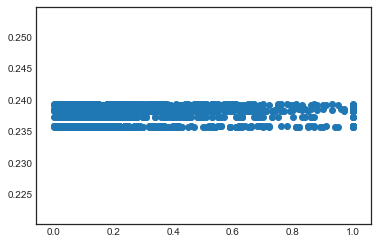

In [14]:
kf = KFold(n_splits=10)

preds_cv = []

for train, test in kf.split(X):
    X_cv = X.iloc[train]
    y_cv = y.iloc[train]
    
    X_cv_test = X.iloc[test]
    
    lm_cv = Lasso(max_iter=5000, tol=0.001)
    lm_cv.fit(X_cv, y_cv)
    preds = lm_cv.predict(X_cv_test)
    preds_cv += list(preds)

mse_cv = mean_squared_error(y, preds_cv)
print("The MSE using cross validation and the Lasso on the entire dataset is %s" % mse_cv)

plt.figure()
plt.scatter(y, preds_cv)
plt.show()


In [16]:
regr2 = RandomForestRegressor(max_features=10, random_state=1)
regr2.fit(Xtrain, ytrain)

pred = regr2.predict(Xtest)
mean_squared_error(ytest, pred)

0.019821982897384304

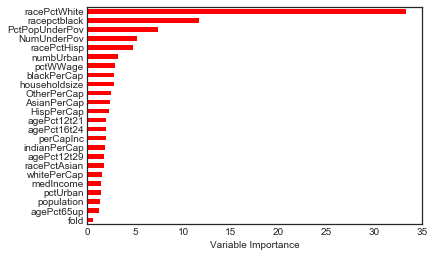

In [17]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [18]:
"""


from sklearn import model_selection

models = []
models.append(('LR', lm))
models.append(('Lasso', lm_cv))
models.append(('RandomForest', regr2))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
"""

'\n\n\nfrom sklearn import model_selection\n\nmodels = []\nmodels.append((\'LR\', lm))\nmodels.append((\'Lasso\', lm_cv))\nmodels.append((\'RandomForest\', regr2))\n\n# evaluate each model in turn\nresults = []\nnames = []\nscoring = \'accuracy\'\nfor name, model in models:\n\tkfold = model_selection.KFold(n_splits=10)\n\tcv_results = model_selection.cross_val_score(model, X, y, cv=kfold)\n\tresults.append(cv_results)\n\tnames.append(name)\n\tmsg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())\n\tprint(msg)\n# boxplot algorithm comparison\nfig = plt.figure()\nfig.suptitle(\'Algorithm Comparison\')\nax = fig.add_subplot(111)\nplt.boxplot(results)\nax.set_xticklabels(names)\nplt.show()\n'

In [9]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


df['High'] = df.ViolentCrimesPerPop.map(lambda x: 1 if x > 0.40 else 0)
#df['HighmedIncome'] = df.medIncome.map(lambda x: 1 if x>0.60 else 0)
#df['HighperCapInc'] = df.perCapInc.map(lambda x: 1 if x>0.30 else 0)
 
X = df[['medIncome', 'perCapInc']]
y = df.High                                    
nn = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000, activation='relu', random_state=1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.5, random_state=1)
nn.fit(Xtrain, ytrain)
preds_nn = nn.predict(Xtest)
cm_nn = pd.DataFrame(confusion_matrix(ytest, preds_nn).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print("Using Neural Network:\n")
print(cm_nn)

tree_acc = accuracy_score(ytest, preds_nn)
print('\nAccuracy is: %s' % tree_acc)   

precision_recall_fscore_support(ytest, preds_nn, average='binary')

auc = roc_auc_score(ytest,preds_nn)
print(auc)

C:\Users\Vinay\PycharmProjects\Labs\venv\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Using Neural Network:

      No  Yes
No   806  171
Yes   17    3

Accuracy is: 0.8114343029087262
0.49829262161142995


In [10]:
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)
preds_logreg = logreg.predict(Xtest)
cm_logreg = pd.DataFrame(confusion_matrix(ytrain, preds_logreg).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print("Using Logistic Regression:\n")
print(cm_logreg)

tree_acc = accuracy_score(ytest, preds_logreg)
print('\nAccuracy is: %s' % tree_acc)

precision_recall_fscore_support(ytest, preds_logreg, average='binary')

Using Logistic Regression:

      No  Yes
No   792  196
Yes    5    4

Accuracy is: 0.8204613841524574


(0.2222222222222222, 0.011494252873563218, 0.02185792349726776, None)

In [11]:
gb = GradientBoostingClassifier(random_state=1)
gb.fit(Xtrain, ytrain)
preds_gb = gb.predict(Xtest)
cm_gb = pd.DataFrame(confusion_matrix(ytest, preds_gb).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print("Using Logistic Regression:\n")
print(cm_gb)

tree_acc = accuracy_score(ytest, preds_gb)
print('\nAccuracy is: %s' % tree_acc)

precision_recall_fscore_support(ytest, preds_logreg, average='binary')

auc = roc_auc_score(ytest,preds_gb)
print(auc)

Using Logistic Regression:

      No  Yes
No   764  146
Yes   59   28

Accuracy is: 0.794383149448345
0.5446152986690131
